In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pylab as plt
import numpy as np
#pip install tensorflow
#pip install tensorflow_hub
#pip install PIL

In [2]:
import pandas as pd
import PIL

In [3]:
import tensorflow as tf
import tensorflow_hub as hub

In [4]:
pd.set_option("display.precision", 8)

In [5]:
money_data = 'dataset_money'

In [6]:
money_data

'dataset_money'

In [7]:
money_IMG_SH = (224, 224)
train_money = str(money_data)
print(train_money);


dataset_money


In [8]:
datagen_k = dict(rescale=1./255, validation_split=.01)



In [9]:
valid_data_money_generator = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_k)


In [10]:
valid_generator_money = valid_data_money_generator.flow_from_directory(
train_money,
subset="validation",
shuffle=True,
target_size=money_IMG_SH
)

Found 321 images belonging to 12 classes.


In [11]:
train_datagenerator_money = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_k)


In [12]:
train_generator_money = train_datagenerator_money.flow_from_directory(
train_money,
subset="training",
shuffle=True,
target_size=money_IMG_SH)

Found 32491 images belonging to 12 classes.


In [13]:
image_money, label__money = next(iter(train_generator_money))


In [14]:
print("Image money batch shape: ", image_money.shape)
print("Label money batch shape: ", label__money.shape)


Image money batch shape:  (32, 224, 224, 3)
Label money batch shape:  (32, 12)


In [15]:
dataset_money_labels = sorted(train_generator_money.class_indices.items(), key=lambda pair:pair[1])


In [16]:
dataset_money_labels = np.array([key.title() for key, value in dataset_money_labels])
print(dataset_money_labels)

['10 Sr' '100 Sr' '100 Usd' '1000 Jpy' '1Sr' '200 Sr' '5 Yuan' '50 Eur'
 '50 Sr' '500 Eur' '500 Sr' '5Sr']


In [17]:
########################################

In [18]:
classifier_money = tf.keras.Sequential([hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",output_shape=[1280],trainable=False),tf.keras.layers.Dropout(0.4),tf.keras.layers.Dense(train_generator_money.num_classes, activation='softmax')])


In [19]:
classifier_money.build([None, 224, 224, 3])
classifier_money.summary()
classifier_money.compile(optimizer = 'adam' , loss='categorical_crossentropy' , metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 12)                15372     
Total params: 2,273,356
Trainable params: 15,372
Non-trainable params: 2,257,984
_________________________________________________________________


In [20]:
#################################

In [21]:
history = classifier_money.fit(train_generator_money,epochs = 15,validation_data = valid_generator_money,verbose=1)

Epoch 1/15
1016/1016 [==============================] - 446s 436ms/step - loss: 0.1407 - accuracy: 0.9685 - val_loss: 0.0117 - val_accuracy: 1.0000
Epoch 2/15
1016/1016 [==============================] - 395s 389ms/step - loss: 0.0119 - accuracy: 0.9989 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 3/15
1016/1016 [==============================] - 404s 398ms/step - loss: 0.0061 - accuracy: 0.9993 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 4/15
1016/1016 [==============================] - 390s 384ms/step - loss: 0.0045 - accuracy: 0.9993 - val_loss: 7.1965e-04 - val_accuracy: 1.0000
Epoch 5/15
1016/1016 [==============================] - 394s 388ms/step - loss: 0.0030 - accuracy: 0.9997 - val_loss: 4.2586e-04 - val_accuracy: 1.0000
Epoch 6/15
1016/1016 [==============================] - 403s 397ms/step - loss: 0.0028 - accuracy: 0.9993 - val_loss: 5.5067e-04 - val_accuracy: 1.0000
Epoch 7/15
1016/1016 [==============================] - 406s 399ms/step - loss: 0.0018 - accuracy: 0

In [22]:
################################

In [23]:
classifier_money.save("my_model_money")

INFO:tensorflow:Assets written to: my_model_money\assets


INFO:tensorflow:Assets written to: my_model_money\assets


In [24]:
################################

In [25]:
scores = classifier_money.evaluate(train_generator_money, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

1016/1016 [==============================] - 399s 393ms/step - loss: 1.1632e-04 - accuracy: 1.0000
Accuracy: 100.00%


In [26]:
###############################

In [27]:
print(classifier_money.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 12)                15372     
Total params: 2,273,356
Trainable params: 15,372
Non-trainable params: 2,257,984
_________________________________________________________________
None


In [28]:
###############################

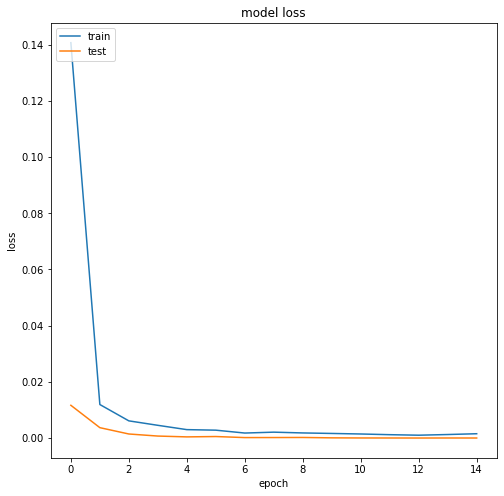

In [29]:
# summarize history for loss
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


In [ ]:
###########################################

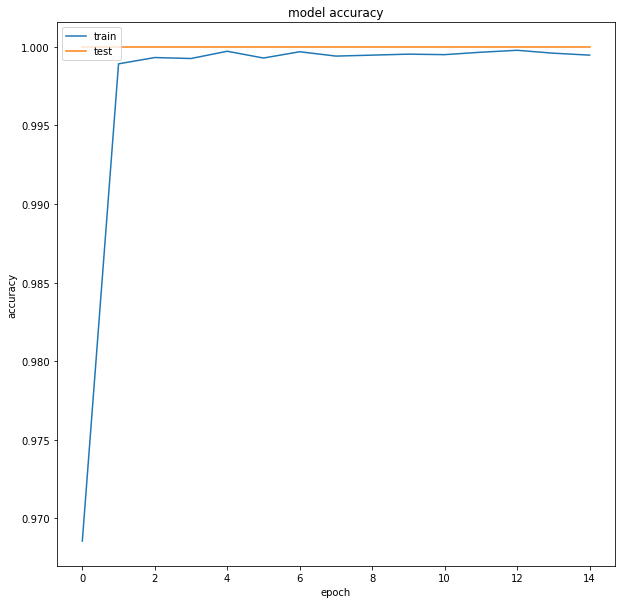

In [31]:
# summarize history for accuracy
fig = plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
##########local TEST#############

5Sr


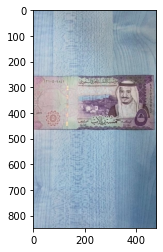

In [33]:
import cv2
img_money = cv2.imread('money_test/1.jpg') 
imgplot = plt.imshow(img_money)
img_money = tf.expand_dims(img_money,0) # need this to make batch_shape = 1
img_money=img_money/255  # normalizing the image
img_money=tf.image.resize(img_money,size=(224, 224)) # resizing image
Prob_money=classifier_money.predict(img_money) # prediction
indd_money=tf.argmax(Prob_money[0],axis=-1).numpy()
print(dataset_money_labels[indd_money])

1Sr


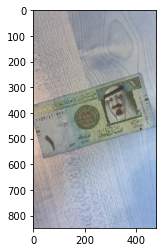

In [34]:
import cv2
img_money = cv2.imread('money_test/2.jpg') 
imgplot = plt.imshow(img_money)
img_money = tf.expand_dims(img_money,0) # need this to make batch_shape = 1
img_money=img_money/255  # normalizing the image
img_money=tf.image.resize(img_money,size=(224, 224)) # resizing image
Prob_money=classifier_money.predict(img_money) # prediction
indd_money=tf.argmax(Prob_money[0],axis=-1).numpy()
print(dataset_money_labels[indd_money])

1Sr


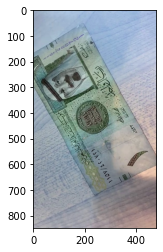

In [35]:
import cv2
img_money = cv2.imread('money_test/3.jpg') 
imgplot = plt.imshow(img_money)
img_money = tf.expand_dims(img_money,0) # need this to make batch_shape = 1
img_money=img_money/255  # normalizing the image
img_money=tf.image.resize(img_money,size=(224, 224)) # resizing image
Prob_money=classifier_money.predict(img_money) # prediction
indd_money=tf.argmax(Prob_money[0],axis=-1).numpy()
print(dataset_money_labels[indd_money])

5 Yuan


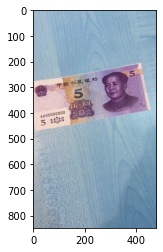

In [36]:
import cv2
img_money = cv2.imread('money_test/4.jpg') 
imgplot = plt.imshow(img_money)
img_money = tf.expand_dims(img_money,0) # need this to make batch_shape = 1
img_money=img_money/255  # normalizing the image
img_money=tf.image.resize(img_money,size=(224, 224)) # resizing image
Prob_money=classifier_money.predict(img_money) # prediction
indd_money=tf.argmax(Prob_money[0],axis=-1).numpy()
print(dataset_money_labels[indd_money])

100 Sr


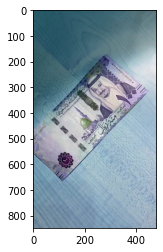

In [37]:
import cv2
img_money = cv2.imread('money_test/5.jpg') 
imgplot = plt.imshow(img_money)
img_money = tf.expand_dims(img_money,0) # need this to make batch_shape = 1
img_money=img_money/255  # normalizing the image
img_money=tf.image.resize(img_money,size=(224, 224)) # resizing image
Prob_money=classifier_money.predict(img_money) # prediction
indd_money=tf.argmax(Prob_money[0],axis=-1).numpy()
print(dataset_money_labels[indd_money])

500 Eur


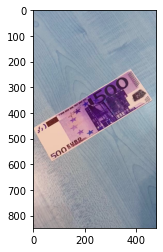

In [38]:
import cv2
img_money = cv2.imread('money_test/6.jpg') 
imgplot = plt.imshow(img_money)
img_money = tf.expand_dims(img_money,0) # need this to make batch_shape = 1
img_money=img_money/255  # normalizing the image
img_money=tf.image.resize(img_money,size=(224, 224)) # resizing image
Prob_money=classifier_money.predict(img_money) # prediction
indd_money=tf.argmax(Prob_money[0],axis=-1).numpy()
print(dataset_money_labels[indd_money])

50 Eur


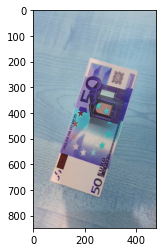

In [39]:
import cv2
img_money = cv2.imread('money_test/7.jpg') 
imgplot = plt.imshow(img_money)
img_money = tf.expand_dims(img_money,0) # need this to make batch_shape = 1
img_money=img_money/255  # normalizing the image
img_money=tf.image.resize(img_money,size=(224, 224)) # resizing image
Prob_money=classifier_money.predict(img_money) # prediction
indd_money=tf.argmax(Prob_money[0],axis=-1).numpy()
print(dataset_money_labels[indd_money])

5Sr


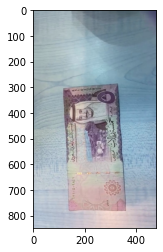

In [42]:
import cv2
img_money = cv2.imread('money_test/10.jpg') 
imgplot = plt.imshow(img_money)
img_money = tf.expand_dims(img_money,0) # need this to make batch_shape = 1
img_money=img_money/255  # normalizing the image
img_money=tf.image.resize(img_money,size=(224, 224)) # resizing image
Prob_money=classifier_money.predict(img_money) # prediction
indd_money=tf.argmax(Prob_money[0],axis=-1).numpy()
print(dataset_money_labels[indd_money])

1000 Jpy


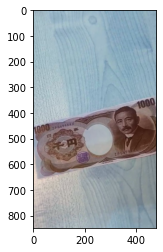

In [43]:
import cv2
img_money = cv2.imread('money_test/11.jpg') 
imgplot = plt.imshow(img_money)
img_money = tf.expand_dims(img_money,0) # need this to make batch_shape = 1
img_money=img_money/255  # normalizing the image
img_money=tf.image.resize(img_money,size=(224, 224)) # resizing image
Prob_money=classifier_money.predict(img_money) # prediction
indd_money=tf.argmax(Prob_money[0],axis=-1).numpy()
print(dataset_money_labels[indd_money])

500 Sr


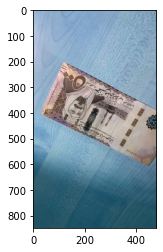

In [44]:
import cv2
img_money = cv2.imread('money_test/12.jpg') 
imgplot = plt.imshow(img_money)
img_money = tf.expand_dims(img_money,0) # need this to make batch_shape = 1
img_money=img_money/255  # normalizing the image
img_money=tf.image.resize(img_money,size=(224, 224)) # resizing image
Prob_money=classifier_money.predict(img_money) # prediction
indd_money=tf.argmax(Prob_money[0],axis=-1).numpy()
print(dataset_money_labels[indd_money])

In [ ]:
#########################################################################